# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation.

### Before You Begin

1. Create a new repository for this project called `matplotlib-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for the assignment **Pymaceuticals**.

4. Add your Jupyter notebook to this folder. This will be the main script to run for analysis.

5. Push the above changes to GitHub or GitLab.

## Pymaceuticals Instructions

![Laboratory](Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* See [Starter Workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a **guideline** of steps you may wish to follow as you complete the assignment. You do not have to follow them step-for-step. Do not get bogged down in trying to interpret and accomplish each step.

* Between these two exercises, the Pymaceuticals one is significantly more challenging. So choose that one only if you feel somewhat comfortable with the material covered so far. The Pymaceuticals example _will_ require you to research a good bit on your own for hacked solutions to problems you'll experience along the way. If you end up choosing this exercise, feel encouraged to constantly refer to Stack Overflow and the Pandas Documentation. These are needed tools in every data analyst's arsenal.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always re-visit old problems.

* Remember: There are many ways to skin a cat, and similarly there are many ways to approach a data problem. The key throughout, however, is to break up your task into micro tasks. Try answering questions like: "How does my Data Frame need to be structured for me to have the right X and Y axis?" "How do I build a basic scatter plot?" "How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?". Again! Don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of smaller, bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But as always, ask a _specific_ question. You'll never get a great answer to: "I'm lost." Good luck!

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import seaborn as sns
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = rain_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single datase
combined_trials_df = pd.merge(clinical_trial_df,mouse_df, how='inner', on='Mouse ID')

# Display the data table for preview

combined_trials_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [65]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tvol_df = combined_trials_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].copy()
tvol_group_df = tvol_df.groupby(['Drug','Timepoint'])
mean_tvol_df = tvol_group_df.mean()
mean_tvol_df = mean_tvol_df.reset_index()
mean_tvol_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [67]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tvol_sem = tvol_group_df.sem()
tvol_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [35]:
# Minor Data Munging to Re-Format the Data Frames
new_tumor_df = pd.DataFrame(mean_tvol_df)
mean_tvol_pivot = new_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_tvol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


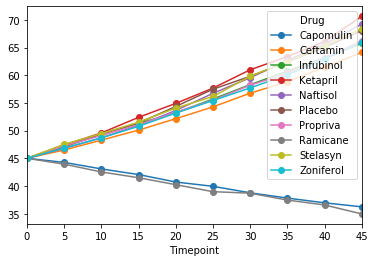

In [69]:


tumor_plot = mean_tvol_pivot.plot(marker = 'o')
tumor_plot



In [45]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [61]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = combined_trials_df[['Drug', 'Timepoint', 'Metastatic Sites']].copy()
met_group_df = met_df.groupby(['Drug','Timepoint'])
met_mean_df = met_group_df.mean()
# met_group_df = mean_tvol_df.reset_index()
# met_df2 = pd.DataFrame(met_group_df)

met_mean_df.head()
# met_df2


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [64]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_df = met_group_df.sem()
met_sem_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [72]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_df2 = met_mean_df.reset_index()
new_met_df = pd.DataFrame(met_mean_df2)
mean_met_pivot = new_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_met_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


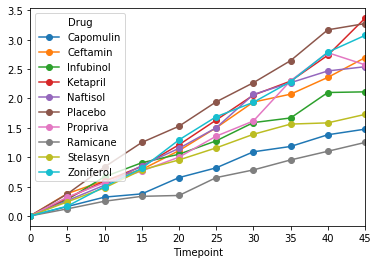

In [75]:
# Generate the Plot (with Error Bar

met_plot = mean_met_pivot.plot(marker = 'o')
met_plot


## Survival Rates

In [87]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = combined_trials_df[['Drug', 'Timepoint', 'Mouse ID']].copy()
mouse_group_df = test.groupby(['Drug','Timepoint'])
mouse_count = mouse_group_df.count()
mouse_count = mouse_count.rename(columns={'Mouse ID':'Mouse Count'})
mouse_count_df = mouse_count.reset_index()
mouse_count_df.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [88]:
# Minor Data Munging to Re-Format the Data Frames
new_mouse_df  = pd.DataFrame(mouse_count_df)
mouse_count_pivot = new_mouse_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


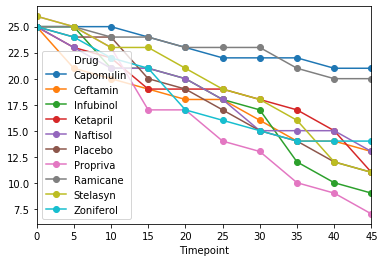

In [89]:
# Generate the Plot (Accounting for percentages)

mouse_plot = mouse_count_pivot.plot(marker = 'o')
mouse_plot


plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

## Observations Analysis
* 1
* 2
* 3